# Application for Audiobooks Company to predict clients behaviour

## Prediction whether the customer will buy.

## Problem
There is data from the Audiobook App in which each customer in the database has made a purchase at least once, that is why we have it's data.

Data was collected for 2.5 years. Data for the first 2 year has been used for preparation the targets column and was caluclated by assign boolean 0 or 1 to each customer depending on that if each one of them has bought another product again for the next 6 months of the data

### Solution

The goal is to make an algorithm which can predict if a customer will buy again.

As a solution approach will be used the model with deep neural network using __TensorFlow__.

The intuition is that if customers have a low probability of coming back, there is no reason to spend any money on theirs advertising.  

The orginal csv file with data contains a few variables that describe customers and theirs behaviours:
1. Customer ID, 
2. Book length average (average length in minutes of all purchases), 
3. Book length overall (sum of the minute length of all purchases), 
5. Price paid average (average of all purchases), 
4. Price paid overall (sum of all purchases),
6. Review (a boolean variable whether the customer left a review), 
7. Review [from 0 to 10] (if the customer left a review, his/her review out of 10), 
8. Percent of completion [from 0 to 1],
9. Total minutes of listening,  
10. Support requests (number of support requests; everything from forgotten password to assistance for using the app), 
11. Last visited since purchase date (in days).

First column of dataset which cointains Customer ID has to be dropped in algorithm and the last column refers to targets.


## Importing libraries and data

In [1]:
#Import libraries
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load data for a view and statistics
columns=['ID','len_avg','len_overall','price_avg','price_overall','if_review','review','completion','total_listen','support_req','last_visit_since_purchase','targets']
path = 'D:\\Dokumenty\\Piotr\\PROJEKTY\\audiobook shop\\audiobooks_data_new.csv'

raw_data = pd.read_csv(path,delimiter=',',header=None,names=columns)

print("Data shape: {0}".format(raw_data.shape))
print('\nSample of observations:')
raw_data[80:85]

Data shape: (14084, 12)

Sample of observations:


,ID,len_avg,len_overall,price_avg,price_overall,if_review,review,completion,total_listen,support_req,last_visit_since_purchase,targets
80,27824,1512.0,6048,5.33,21.33,0,NaN,0.00,0.00,0,0,1
81,1143,2160.0,2160,5.33,5.33,0,NaN,0.00,0.00,0,0,0
82,2059,2160.0,2160,5.33,5.33,0,NaN,0.00,0.00,0,388,0
83,23200,648.0,648,10.13,10.13,1,9.0,0.26,168.48,0,337,0
84,2882,1620.0,1620,5.96,5.96,0,NaN,0.42,680.40,1,129,0


In [3]:
raw_data.describe()

,ID,len_avg,len_overall,price_avg,price_overall,if_review,review,completion,total_listen,support_req,last_visit_since_purchase,targets
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,2467.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,0.175163,8.908926,0.125659,189.888983,0.070222,61.935033,0.158833
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.380120,1.537566,0.241206,371.084010,0.472157,88.207634,0.365533
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,0.000000,10.000000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,0.000000,10.000000,0.130000,194.400000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
ID                           14084 non-null int64
len_avg                      14084 non-null float64
len_overall                  14084 non-null int64
price_avg                    14084 non-null float64
price_overall                14084 non-null float64
if_review                    14084 non-null int64
review                       2467 non-null float64
completion                   14084 non-null float64
total_listen                 14084 non-null float64
support_req                  14084 non-null int64
last_visit_since_purchase    14084 non-null int64
targets                      14084 non-null int64
dtypes: float64(6), int64(6)
memory usage: 1.3 MB


## Preprocessing

Now we can see that in one column 'review' there are missing values and they are in the majority. The solution for that problem might be replacing those missing values by an average for these ones that exist. Another approach could be removing this column. There are also algorithms like LightGBM that can handle unbalanced inputs.

In [5]:
#Amount of reviews
reviews_count = np.sum(raw_data['if_review'])
#Sum of all reviews
reviews_sum = np.sum(raw_data['review'])
#Avarage of reviews
reviews_avg = np.round(reviews_sum / reviews_count,3)
print('An avergae of exisiting reviews: {0}'.format(reviews_avg))

An avergae of exisiting reviews: 8.909


In [6]:
raw_data['review'].fillna(value=reviews_avg,inplace=True)

In [7]:
raw_data[80:90]

,ID,len_avg,len_overall,price_avg,price_overall,if_review,review,completion,total_listen,support_req,last_visit_since_purchase,targets
80,27824,1512.0,6048,5.33,21.33,0,8.909,0.00,0.00,0,0,1
81,1143,2160.0,2160,5.33,5.33,0,8.909,0.00,0.00,0,0,0
82,2059,2160.0,2160,5.33,5.33,0,8.909,0.00,0.00,0,388,0
83,23200,648.0,648,10.13,10.13,1,9.000,0.26,168.48,0,337,0
84,2882,1620.0,1620,5.96,5.96,0,8.909,0.42,680.40,1,129,0
85,3342,2160.0,2160,5.33,5.33,0,8.909,0.22,475.20,0,361,0
86,3416,2160.0,2160,4.61,4.61,0,8.909,0.00,0.00,0,0,0
87,31759,2160.0,2160,5.33,5.33,1,10.000,0.00,0.00,0,294,1
88,4949,2160.0,2160,5.33,5.33,0,8.909,0.04,86.40,0,366,0
89,9011,648.0,648,5.33,5.33,0,8.909,0.00,0.00,0,0,1


In [8]:
#Check the average again for all review values
reviews_avg = np.round(np.mean(raw_data['review']),3)
print('An average of reviews after replacement missing values: {0}'.format(reviews_avg))

An average of reviews after replacement missing values: 8.909


In [9]:
#As an option - removing certain columns to check if this helps to improve the algorithm
#raw_data = raw_data.drop('review',axis=1)
#raw_data = raw_data.drop('if_review',axis=1)
#raw_data = raw_data.drop('support_req',axis=1)
#raw_data.head()

In [10]:
#As an option -  Feature engineering
#raw_data.insert(loc=3,column='books quantity', value=raw_data['len_overall']/raw_data['len_avg'])
#raw_data.insert(loc=6,column='avg_price/len_avg', value=raw_data['price_avg']/raw_data['len_avg'])
raw_data.insert(loc=10,column='engagement',value=raw_data['completion']*raw_data['last_visit_since_purchase'])
print("Quantity of variables without ID: {0}".format(raw_data.shape[1]-2))
raw_data.head()

Quantity of variables without ID: 11


,ID,len_avg,len_overall,price_avg,price_overall,if_review,review,completion,total_listen,support_req,engagement,last_visit_since_purchase,targets
0,994,1620.0,1620,19.73,19.73,1,10.0,0.99,1603.8,5,91.08,92,0
1,29480,1620.0,1620,5.33,5.33,1,2.0,0.00,0.0,0,0.00,145,1
2,21785,324.0,324,5.33,5.33,1,2.0,0.00,0.0,0,0.00,0,1
3,16978,1404.0,2808,6.67,13.33,1,3.0,0.00,0.0,1,0.00,176,1
4,14642,1188.0,1188,5.33,5.33,1,4.0,0.00,0.0,0,0.00,255,1


### Save data to csv for further operations

In [11]:
#Save raw data to csv file 
raw_data.to_csv('raw_data.csv',index=False, header=False)

In [12]:
path2= 'raw_data.csv'

#Load data to numpy format
raw_csv_data = np.loadtxt(path2,delimiter=",")
raw_csv_data[0]

array([9.9400e+02, 1.6200e+03, 1.6200e+03, 1.9730e+01, 1.9730e+01,
       1.0000e+00, 1.0000e+01, 9.9000e-01, 1.6038e+03, 5.0000e+00,
       9.1080e+01, 9.2000e+01, 0.0000e+00])

### Split data into inputs and targets

In [13]:
#Raw inputs / the first column are IDs and the last column includes targets, need to drop these ones for getting inputs
raw_inputs = raw_csv_data[:,1:-1]
#Raw targets / last column
raw_targets = raw_csv_data[:,-1]

print('Percent of clients who has bought again in 6 months after data has been collected: {0}'.format(100*np.round(np.sum(raw_targets)/len(raw_targets),5))+'%')

Percent of clients who has bought again in 6 months after data has been collected: 15.883%


### Shuffled data
Before balancing to avoid situation when there are around 2300 targets that are 1s in full range of data collection time (2 years) but only a few months contain the same number of 0s targets.

In [14]:
#Seed
np.random.seed(123)
#Shuffle indieces
shuffled_indices = np.arange(raw_inputs.shape[0])
np.random.shuffle(shuffled_indices)

#Shuffle inputs and targets using shuffled indieces
raw_shuffled_inputs = raw_inputs[shuffled_indices]
raw_shuffled_targets = raw_targets[shuffled_indices]

### Balance tha data set
For keeping as many 0s as 1s targets, remove those more numerous

In [15]:
#Number of customers who have bought again in 6 months after the data was final collected
num_one_targets = int(np.sum(raw_shuffled_targets))
#Counter of customers who have not bought
zero_targets_counter = 0
#List for collecting indices for observation that will be removed
indices_to_remove = []

#Collect indices of targets 0 when the number of zeros and ones reach the equilibrium
for i in range(raw_targets.shape[0]):
    if raw_targets[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

print("Number of observation to remove: {0}".format(len(indices_to_remove)))


Number of observation to remove: 9610


In [16]:
#Balance inputs and targets by removing additional observations
balanced_inputs = np.delete(raw_inputs, indices_to_remove, axis=0)
balanced_targets = np.delete(raw_targets, indices_to_remove, axis=0)

print("Inputs size: ", len(balanced_inputs),
      "\nTargets size:", len(balanced_targets))

Inputs size:  4474 
Targets size: 4474


### Standardize the inputs

Center to the mean and component wise scale to unit variance.

In [17]:
std_inputs = preprocessing.scale(balanced_inputs)

### Shuffle the data again
Train, validation, and test have to be balanced by themselves

In [18]:
#Seed
np.random.seed(12345)
#Shuffle indieces again
shuffled_indices = np.arange(std_inputs.shape[0])
np.random.shuffle(shuffled_indices)

#Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = std_inputs[shuffled_indices]
shuffled_targets = balanced_targets[shuffled_indices]

## Split into train, validation and test sets 

In [19]:
#Total number of samples
total_samples_count= shuffled_inputs.shape[0]
print("total number of observations: {0}".format(total_samples_count),"\n")

#Number of each subset (80% training, 10% validation, 10% test sets)
train_samples_count = int(0.80*total_samples_count)
valid_samples_count = int(0.1*total_samples_count)
test_samples_count = total_samples_count - train_samples_count - valid_samples_count

print("train size:      {0}".format(train_samples_count), 
      "\nvalidation size: {0}".format(valid_samples_count),
      "\ntest size:       {0}".format(test_samples_count),"\n")

#Create:
#Training sets
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

#Validation sets
valid_inputs = shuffled_inputs[train_samples_count:train_samples_count+valid_samples_count]
valid_targets = shuffled_targets[train_samples_count:train_samples_count+valid_samples_count]

#Test sets
test_inputs = shuffled_inputs[train_samples_count+valid_samples_count:]
test_targets = shuffled_targets[train_samples_count+valid_samples_count:]

#Check if balance is in approximation 50%
print("     ","targets"," samples", " balance")
print("train",np.sum(train_targets)," ", train_samples_count,"   ", np.round(np.sum(train_targets) / train_samples_count,decimals=5))
print("valid",np.sum(valid_targets),"  ", valid_samples_count, "    ",np.round(np.sum(valid_targets) / valid_samples_count,decimals=5))
print("test ",np.sum(test_targets),"  ", test_samples_count, "    ",np.round(np.sum(test_targets) / test_samples_count, decimals=5))

total number of observations: 4474 

train size:      3579 
validation size: 447 
test size:       448 

      targets  samples  balance
train 1789.0   3579     0.49986
valid 222.0    447      0.49664
test  226.0    448      0.50446


### Save training, valiation and test sets as npz file for Tensorflow usage

In [20]:
np.savez('audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('audiobooks_data_valid', inputs=valid_inputs, targets=valid_targets)
np.savez('audiobooks_data_test', inputs=test_inputs, targets=test_targets)

## Class for batching

In [21]:
class AudiobooksDataReader():
    
    """
    Class that will do the batching for the algorithm
    """

    def __init__(self, dataset, batch_size = None):
        
        #Load subset of the data, one from: "train", "validation" or "test" 
        npz = np.load('audiobooks_data_{0}.npz'.format(dataset))
        
        #Create variables of inputs and outputs for given subsets of data
        self.inputs, self.targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)
        
        #Save the number of batch size
        #If the batch size is None, it's validation or testing, so the data is in a single batch        
        if batch_size is None: 
            self.batch_size = self.inputs.shape[0]
        else:
            self.batch_size = batch_size
            
        #Set the counter for batches starting from 0
        self.curr_batch = 0
        
        #Calculate the number of batches
        self.batch_count = self.inputs.shape[0] // self.batch_size
    
    #Load the next batch
    def __next__(self):
        if self.curr_batch >= self.batch_count:
            self.curr_batch = 0
            raise StopIteration()
            
        #Slicing the dataset in batches and then loading them one after the other
        batch_slice = slice(self.curr_batch * self.batch_size, \
                           (self.curr_batch + 1) * self.batch_size)
        inputs_batch = self.inputs[batch_slice]
        targets_batch = self.targets[batch_slice]
        self.curr_batch += 1
        
        #One-hot encode the targets. Optional task in binary classification
        classes_num = 2
        targets_one_hot = np.zeros((targets_batch.shape[0], classes_num))
        targets_one_hot[range(targets_batch.shape[0]), targets_batch] = 1
        
        #Return the inputs batch and the one-hot encoded targets
        return inputs_batch, targets_one_hot
    
        
    #Iterating over the batches,
    def __iter__(self):
        return self

## Deep Learining Model with TensorFlow
### Set up the model

In [22]:
#Seed
tf.set_random_seed(123)
#Input size depends on the number of input variables
input_size = 11
#Output size of binary classification
output_size = 2
#Hidden layer size
hidden_layer_size = 50
#Set the batch size
batch_size = 100
#Set learing rate
l_rate = 0.0005
#Set early stopping mechanisms
max_epochs = 1000
prev_validation_loss = 9999999.


#Reset the default graph, in case of reuse 
tf.reset_default_graph()


#Create placeholders
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.int32, [None, output_size])

#Parameters and operations of the model
weights_1 = tf.get_variable("weights_1", [input_size, hidden_layer_size])
biases_1 = tf.get_variable("biases_1", [hidden_layer_size])
outputs_1 = tf.nn.relu(tf.matmul(inputs, weights_1) + biases_1)

weights_2 = tf.get_variable("weights_2", [hidden_layer_size, hidden_layer_size])
biases_2 = tf.get_variable("biases_2", [hidden_layer_size])
outputs_2 = tf.nn.sigmoid(tf.matmul(outputs_1, weights_2) + biases_2)

weights_3 = tf.get_variable("weights_3", [hidden_layer_size, output_size])
biases_3 = tf.get_variable("biases_3", [output_size])

#In this case no usage of activation function as it is use in loss below
outputs = tf.matmul(outputs_2, weights_3) + biases_3

#Use the softmax cross entropy loss with logits
loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs, labels=targets)
mean_loss = tf.reduce_mean(loss)

#Get a 0 or 1 for every input indicating if an output is the correct answer
out_equals_target = tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1))

#accuracy
accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))

#Optimize with ADAM / ADAptive Moment estimator - include RMSProp and Momentum /
optimize = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(mean_loss)

#Start a tensorflow session
sess = tf.InteractiveSession()

#Initialize the variables
initializer = tf.global_variables_initializer()
sess.run(initializer)

#Load the first batch of training and validation
train_data = AudiobooksDataReader('train', batch_size)
validation_data = AudiobooksDataReader('valid')


### Train the model

In [23]:
#loop for epochs
for epoch_counter in range(max_epochs):
    
    #Set eopch los to a float '0'
    curr_epoch_loss = 0.
    
    #Iterate over training data by using he __next__ method
    for input_batch, target_batch in train_data:
        _, batch_loss = sess.run([optimize, mean_loss], 
            feed_dict={inputs: input_batch, targets: target_batch})
        
        #Record the batch loss into the current epoch loss
        curr_epoch_loss += batch_loss
     
    #Calculate the mean curr_epoch_loss
    curr_epoch_loss /= train_data.batch_count
    
    #Set validation loss and accuracy for the epoch to zero
    validation_loss = 0.
    validation_accuracy = 0.
    
    #Forward propagate the validation set
    for input_batch, target_batch in validation_data:
        validation_loss, validation_accuracy= sess.run([mean_loss, accuracy], 
        feed_dict={inputs: input_batch, targets: target_batch})   
        
    print('Epoch '+str(epoch_counter+1)+
          '. Training loss: {0:.3f}'.format(curr_epoch_loss)+
          '. Validation loss: {0:.3f}'.format(validation_loss)+
          '. Validation accuracy: {0:.2f}'.format(validation_accuracy * 100.)+'%')


    if validation_loss > prev_validation_loss:
        break
        
    prev_validation_loss = validation_loss
    
print('End of training.')

Epoch 1. Training loss: 0.639. Validation loss: 0.613. Validation accuracy: 64.43%
Epoch 2. Training loss: 0.566. Validation loss: 0.557. Validation accuracy: 76.29%
Epoch 3. Training loss: 0.516. Validation loss: 0.511. Validation accuracy: 76.73%
Epoch 4. Training loss: 0.477. Validation loss: 0.477. Validation accuracy: 77.18%
Epoch 5. Training loss: 0.448. Validation loss: 0.452. Validation accuracy: 76.96%
Epoch 6. Training loss: 0.426. Validation loss: 0.435. Validation accuracy: 78.52%
Epoch 7. Training loss: 0.411. Validation loss: 0.423. Validation accuracy: 77.40%
Epoch 8. Training loss: 0.399. Validation loss: 0.413. Validation accuracy: 77.63%
Epoch 9. Training loss: 0.390. Validation loss: 0.405. Validation accuracy: 77.63%
Epoch 10. Training loss: 0.382. Validation loss: 0.399. Validation accuracy: 77.85%
Epoch 11. Training loss: 0.376. Validation loss: 0.393. Validation accuracy: 78.52%
Epoch 12. Training loss: 0.370. Validation loss: 0.388. Validation accuracy: 79.42%
E

## Test the model

In [24]:
#Load test subset
test_data = AudiobooksDataReader('test')

for input_batch, target_batch in test_data:
    test_accuracy  = sess.run([accuracy],
    feed_dict={inputs: input_batch, targets:target_batch})

test_accuracy_percent = test_accuracy[0]*100
print('Test accuracy: {0:.2f}'.format(test_accuracy_percent)+'%')

Test accuracy: 83.93%


## Summary

The deep neural network can predict behaviour 4 of 5 clients, so it's a good achievement.

### Try a LGBM model

In [25]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [27]:
#Load data and preprocess as before
path_data = 'D:\\Dokumenty\\Piotr\\PROJEKTY\\audiobook shop\\audiobooks_data_new.csv'
raw_data = pd.read_csv(path_data,delimiter=',',header=None,names=columns)
raw_data['review'].fillna(value=reviews_avg,inplace=True)
raw_data.insert(loc=10,column='completion*last_visit_since_purchase',value=raw_data['completion']*raw_data['last_visit_since_purchase'])

raw_data.to_csv('raw_data.csv',index=False, header=False)
path_csv= 'raw_data.csv'
raw_csv_data = np.loadtxt(path_csv,delimiter=",")

raw_inputs = raw_csv_data[:,1:-1]
raw_targets = raw_csv_data[:,-1]
std_inputs = preprocessing.scale(raw_inputs)

In [28]:
#Split data:
#Test set
x, x_test, y, y_test = train_test_split(std_inputs,raw_targets,test_size=0.2,  random_state=12345)
#Train and valid sets
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.25, random_state=12345)

In [29]:
#Build model
d_train = lgb.Dataset(x_train, y_train)
d_valid = lgb.Dataset(x_valid, y_valid)
d_test = lgb.Dataset(x_test, y_test)

watchlist = [d_train, d_valid, d_test]

params = {"metric" : ["auc", "binary_error"], "apllication" : "binary", "num_leaves" : [220], 
         "min_data_in_leaf" : [8]}


In [30]:
#Train model
model = lgb.train(params, train_set= d_train, num_boost_round=100, valid_sets= watchlist, early_stopping_rounds=100)

[1]	training's auc: 0.947898	training's binary_error: 0.159645	valid_1's auc: 0.889374	valid_1's binary_error: 0.150515	valid_2's auc: 0.876971	valid_2's binary_error: 0.164714
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.949118	training's binary_error: 0.159645	valid_1's auc: 0.89234	valid_1's binary_error: 0.150515	valid_2's auc: 0.876407	valid_2's binary_error: 0.164714
[3]	training's auc: 0.94973	training's binary_error: 0.159645	valid_1's auc: 0.893078	valid_1's binary_error: 0.150515	valid_2's auc: 0.876287	valid_2's binary_error: 0.164714
[4]	training's auc: 0.950736	training's binary_error: 0.159645	valid_1's auc: 0.895889	valid_1's binary_error: 0.150515	valid_2's auc: 0.882951	valid_2's binary_error: 0.164714
[5]	training's auc: 0.95108	training's binary_error: 0.0959763	valid_1's auc: 0.89685	valid_1's binary_error: 0.086972	valid_2's auc: 0.883397	valid_2's binary_error: 0.102946
[6]	training's auc: 0.952262	training's binary_error: 0

[51]	training's auc: 0.965955	training's binary_error: 0.0484024	valid_1's auc: 0.88832	valid_1's binary_error: 0.0891019	valid_2's auc: 0.87474	valid_2's binary_error: 0.105431
[52]	training's auc: 0.966113	training's binary_error: 0.0481657	valid_1's auc: 0.887665	valid_1's binary_error: 0.0887469	valid_2's auc: 0.873526	valid_2's binary_error: 0.105786
[53]	training's auc: 0.966255	training's binary_error: 0.0480473	valid_1's auc: 0.886682	valid_1's binary_error: 0.0880369	valid_2's auc: 0.87459	valid_2's binary_error: 0.105076
[54]	training's auc: 0.966373	training's binary_error: 0.0478107	valid_1's auc: 0.886745	valid_1's binary_error: 0.086972	valid_2's auc: 0.874105	valid_2's binary_error: 0.105076
[55]	training's auc: 0.966495	training's binary_error: 0.0478107	valid_1's auc: 0.88684	valid_1's binary_error: 0.0873269	valid_2's auc: 0.873093	valid_2's binary_error: 0.105431
[56]	training's auc: 0.966595	training's binary_error: 0.0478107	valid_1's auc: 0.886533	valid_1's binary

In [31]:
model.best_score

defaultdict(dict,
            {'training': {'auc': 0.9698240436176155,
              'binary_error': 0.04272189349112426},
             'valid_1': {'auc': 0.8817935961018379,
              'binary_error': 0.09300674476393327},
             'valid_2': {'auc': 0.8631451778360714,
              'binary_error': 0.10862619808306709}})

The AUC score on second valid (test) set is about 85-87% and binarry error is about 10-11%, so it's a good model.


Plot shows how much important was each variable used in lgbm algorithm:


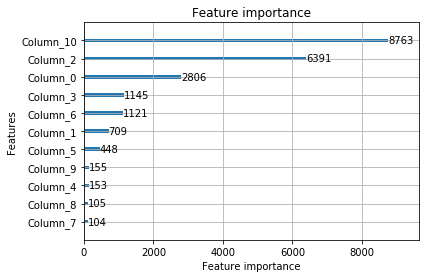

In [32]:
import matplotlib.pyplot as plt
#Feature importance
lgb.plot_importance(model)
print("\nPlot shows how much important was each variable used in lgbm algorithm:")
plt.show()


In [33]:
raw_data.drop(['ID','targets'],axis=1).head()

,len_avg,len_overall,price_avg,price_overall,if_review,review,completion,total_listen,support_req,completion*last_visit_since_purchase,last_visit_since_purchase
0,1620.0,1620,19.73,19.73,1,10.0,0.99,1603.8,5,91.08,92
1,1620.0,1620,5.33,5.33,1,2.0,0.00,0.0,0,0.00,145
2,324.0,324,5.33,5.33,1,2.0,0.00,0.0,0,0.00,0
3,1404.0,2808,6.67,13.33,1,3.0,0.00,0.0,1,0.00,176
4,1188.0,1188,5.33,5.33,1,4.0,0.00,0.0,0,0.00,255


Most importance columns for algorithm are: last visit since purchase, price_avg and len_avg